<a href="https://colab.research.google.com/github/shruti-sharma12/DNN-LAB/blob/main/Dnn_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SHRUTI SHARMA

PRN: 1032211936

CLASS: TY ECE-AIML

DATE: 02/05/2024

APPLICATION: MRI TUMOR SEGMENTATION

DATASET: BRAIN TUMOR MRI DATASET

MODEL USED: CNN

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
import cv2

In [23]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive/Training',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
         '/content/drive/MyDrive/archive/Testing',
        target_size=(150, 150),
        batch_size=20,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=True)

Found 1180 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


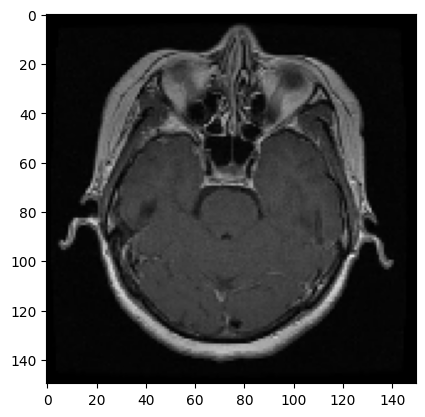

In [25]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    plt.imshow(data_batch[0])
    break

In [26]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [28]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=8,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=1)

<ipython-input-28-6d90c08e0ebb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 0.4531 - acc: 0.8750
Epoch 2/10
8/8 [==============================] - 8s 977ms/step - loss: 0.0460 - acc: 1.0000
Epoch 3/10
8/8 [==============================] - 8s 977ms/step - loss: 0.0074 - acc: 1.0000
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.0028 - acc: 1.0000
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.0012 - acc: 1.0000
Epoch 6/10
8/8 [==============================] - 8s 964ms/step - loss: 7.8026e-04 - acc: 1.0000
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 4.8049e-04 - acc: 1.0000
Epoch 8/10
8/8 [==============================] - 10s 1s/step - loss: 2.8501e-04 - acc: 1.0000
Epoch 9/10
8/8 [==============================] - 10s 1s/step - loss: 1.9439e-04 - acc: 1.0000
Epoch 10/10
8/8 [==============================] - 10s 1s/step - loss: 1.6039e-04 - acc: 1.0000


In [29]:
import os

# Check directory permissions
directory_path = '/content/drive/MyDrive/archive/Testing'
directory_permissions = os.stat(directory_path).st_mode
print("Directory Permissions:", oct(directory_permissions))

# Check file permissions (example for JPEG files)
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory_path, filename)
        file_permissions = os.stat(file_path).st_mode
        print(f"File: {filename}, Permissions: {oct(file_permissions)}")


Directory Permissions: 0o40700


In [30]:
# Modify directory permissions
os.chmod(directory_path, 0o755)

# Modify file permissions (example for JPEG files)
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory_path, filename)
        os.chmod(file_path, 0o644)


In [31]:
test_generator = test_datagen.flow_from_directory(
         '/content/drive/MyDrive/archive/Testing',
        target_size=(150, 150),
        batch_size=20,
        color_mode='rgb',
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 0 images belonging to 4 classes.


<ipython-input-31-11df627e3d2e>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


ValueError: Asked to retrieve element 0, but the Sequence has length 0